**GrabCut method for foreground-background-separation**

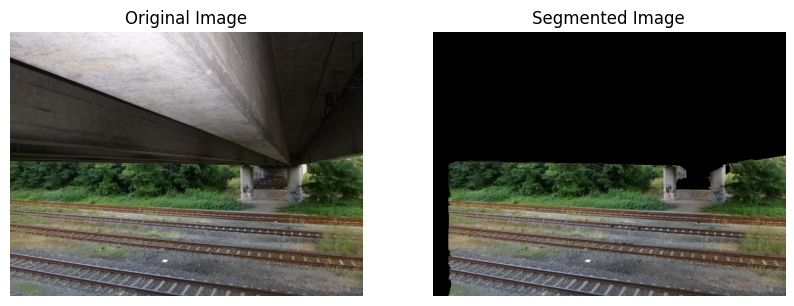

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0050.jpg"
image_path = path + file
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize mask
mask = np.zeros(image.shape[:2], np.uint8)

# Create temporary arrays used by the algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle around the object you want to segment
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)  # You might need to adjust this

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask such that 0 and 2 pixels are converted to the background
# and 1 and 3 pixels are converted to the foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply the input image with the new mask to get the segmented image
segmented_image = image_rgb * mask2[:, :, np.newaxis]

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()



**Graph-based segmentation approach for foreground-background-separation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color
from skimage.future import graph
import networkx as nx

# Load a sample image
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0005.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create graph using k-means clustering
labels1 = segmentation.slic(image, compactness=30, n_segments=400)
edges = segmentation.find_boundaries(labels1)

# Calculate edge weights
edges_weights = graph.rag_boundary(gray_image, edges)

# Build graph
g = nx.Graph()
g.add_weighted_edges_from([(e[0], e[1], edges_weights[e]) for e in edges_weights])

# Calculate Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(g)

# Extract the connected components of the MST
segments = np.zeros_like(labels1)
for i, comp in enumerate(nx.connected_components(mst)):
    for c in comp:
        segments[labels1 == c] = i + 1

# Display the results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(segments, cmap='viridis')
ax[1].set_title('Segmented Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


ImportError: cannot import name 'graph' from 'skimage.future' (c:\Users\koeni\miniconda3\Lib\site-packages\skimage\future\__init__.py)